In [2]:
# data manipulation
import numpy as np #calculations
import pandas as pd #dataframe

# modeling utilities
from sklearn import metrics # score functions, performance metrics .etc
from sklearn import preprocessing #Encoding
from sklearn.tree import DecisionTreeRegressor #Decision tree algorithm
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split #Train test split
from sklearn import tree #Tree map
from sklearn.linear_model import LogisticRegression #Logistic Algorithm

# plotting libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visual

import warnings #ignore warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_excel(r'C:\Users\Abdullah Ahamed\Downloads\DS2_C5_S5_HR_Data_Practice.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


In [5]:
df2 = pd.read_excel(r'C:\Users\Abdullah Ahamed\Downloads\DS2_C5_S5_HR_Data_Practice.xlsx')

In [4]:
df.shape

(14999, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,30085.475432
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,33465.313560
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,10334.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,20875.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,38186.500000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,199768.000000


### T1

<AxesSubplot:xlabel='salary', ylabel='left'>

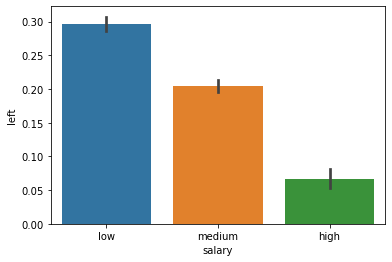

In [7]:
sns.barplot(x = 'salary', y = 'left', data = df)

([<matplotlib.patches.Wedge at 0x2143743aa90>,
 [Text(-0.3449577936275543, 1.0445114267520532, '0'),
  Text(0.3449578914217707, -1.044511394454769, '1')],
 [Text(-0.18815879652412051, 0.5697335055011199, '60.15%'),
  Text(0.18815884986642034, -0.5697334878844194, '39.85%')])

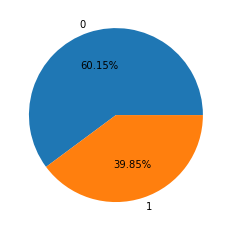

In [8]:
g= df.groupby([df['left']])['salary_num'].mean()

plt.pie(g.values,labels=g.index,autopct='%.2f%%')

<AxesSubplot:xlabel='left', ylabel='salary_num'>

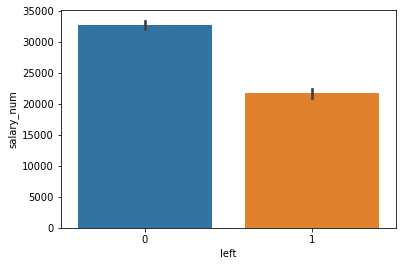

In [9]:
sns.barplot(y = 'salary_num', x = 'left', data = df)

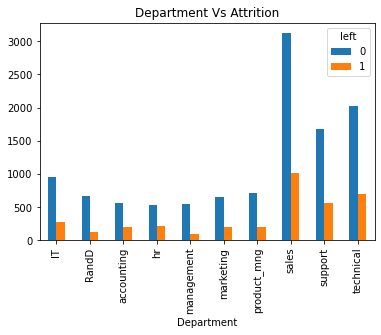

In [10]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar').set(
    title="Department Vs Attrition")
plt.xticks(rotation = 90)
plt.show()

In [11]:
df[df.isnull().any(axis=1)]

#No Null values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num


#### Correlation Table

In [12]:
cor = df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


#### Using Label Encoder to convert cat to num

In [13]:
encoder = preprocessing.LabelEncoder()

encoder.fit(df['Department'])
print(encoder.classes_)
df['Department'] = encoder.transform(df['Department'])

df.head()

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,7,low,4649
1,0.80,0.86,5,262,6,0,1,0,7,medium,34126
2,0.11,0.88,7,272,4,0,1,0,7,medium,40522
3,0.72,0.87,5,223,5,0,1,0,7,low,6916
4,0.37,0.52,2,159,3,0,1,0,7,low,10928


### Dummy Encoding

In [47]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


Encoding with dummies

In [22]:
# salary
#s_dummies = pd.get_dummies(df2.salary, prefix="salary")
#df_with_dummies = pd.concat([df_with_dummies,s_dummies],axis='columns')
#df_with_dummies.drop('salary',axis='columns',inplace=True)
# dept
d_dummies = pd.get_dummies(df2.Department, prefix="Department")
df_with_dummies = pd.concat([df_with_dummies,d_dummies],axis='columns')
df_with_dummies.drop('Department',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,salary_num,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,4649,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,34126,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,40522,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,6916,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,10928,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# salary
s_dummies = pd.get_dummies(df2.salary, prefix="salary")
df_with_dummies = pd.concat([df2,s_dummies],axis='columns')

In [19]:
s_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [26]:
df_with_dummies.shape

(14999, 22)

In [27]:
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,4649,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,34126,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,40522,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,6916,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,10928,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5089,0,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,4001,0,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,12842,0,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,8849,0,...,0,0,0,0,0,0,0,0,1,0


### DecisionTree Regressor with dummies

In [28]:
X = df_with_dummies
X.head()
y=df2.count

In [ ]:
#X.drop('datetime', axis='columns', inplace=True)

In [29]:
# Divide the dataset into training and testing sets
df_train, df_test = train_test_split(X, train_size=0.7)
print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)

Size of training dataset:  (10499, 22)
Size of test dataset:  (4500, 22)


In [30]:
X_train = df_train.drop(columns='salary_num', axis =1)
y_train = df_train['salary_num']
X_test = df_test.drop(columns='salary_num', axis =1)
y_test = df_test['salary_num']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 21), (10499,), (4500, 21), (4500,))

In [31]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.824016809822355
R-Squaredon test dataset=0.8310444418653271


### Label Encoder

In [16]:
encoder = preprocessing.LabelEncoder()

encoder.fit(df['salary'])
print(encoder.classes_)
df['salary'] = encoder.transform(df['salary'])

df.head()

['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,7,1,4649
1,0.80,0.86,5,262,6,0,1,0,7,2,34126
2,0.11,0.88,7,272,4,0,1,0,7,2,40522
3,0.72,0.87,5,223,5,0,1,0,7,1,6916
4,0.37,0.52,2,159,3,0,1,0,7,1,10928


#### Correlation after encoding

<AxesSubplot:>

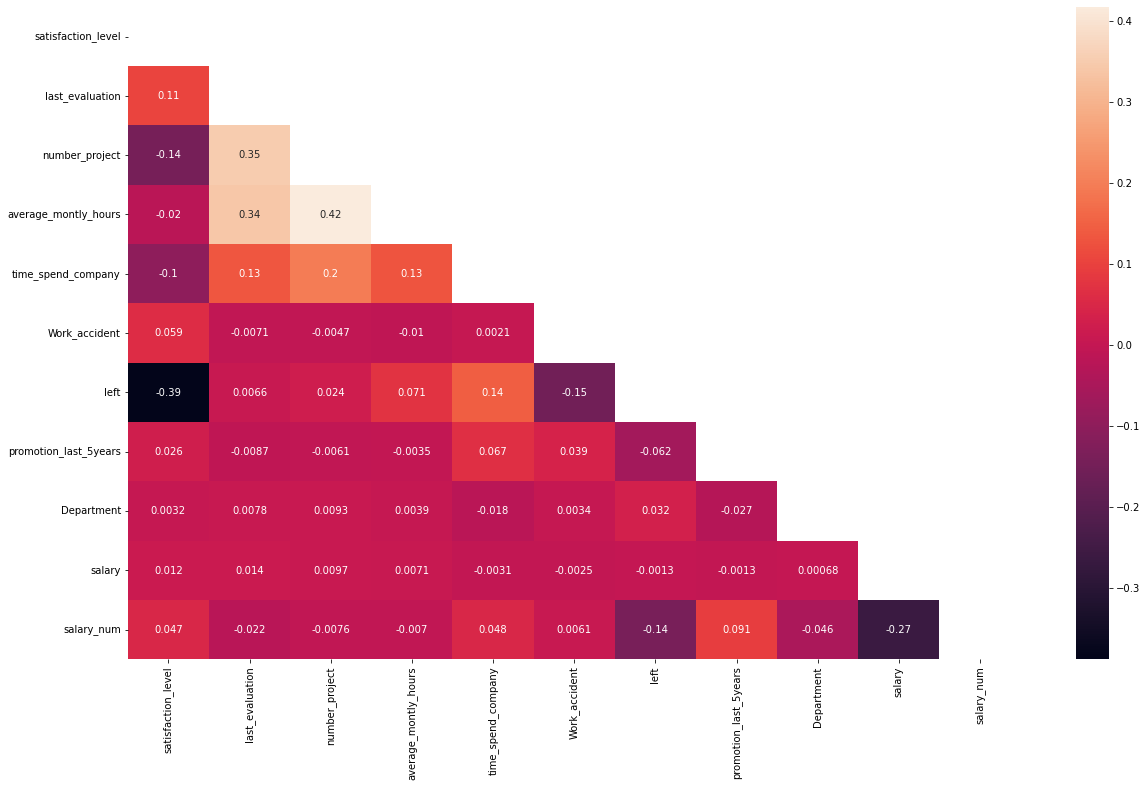

In [17]:
cor = df.corr()
mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(20,12))
sns.heatmap(cor, mask=mask, annot=True)

In [18]:
df1= df.drop(['left', 'salary'], axis = 1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_num
0,0.38,0.53,2,157,3,0,0,7,4649
1,0.80,0.86,5,262,6,0,0,7,34126
2,0.11,0.88,7,272,4,0,0,7,40522
3,0.72,0.87,5,223,5,0,0,7,6916
4,0.37,0.52,2,159,3,0,0,7,10928


<AxesSubplot:>

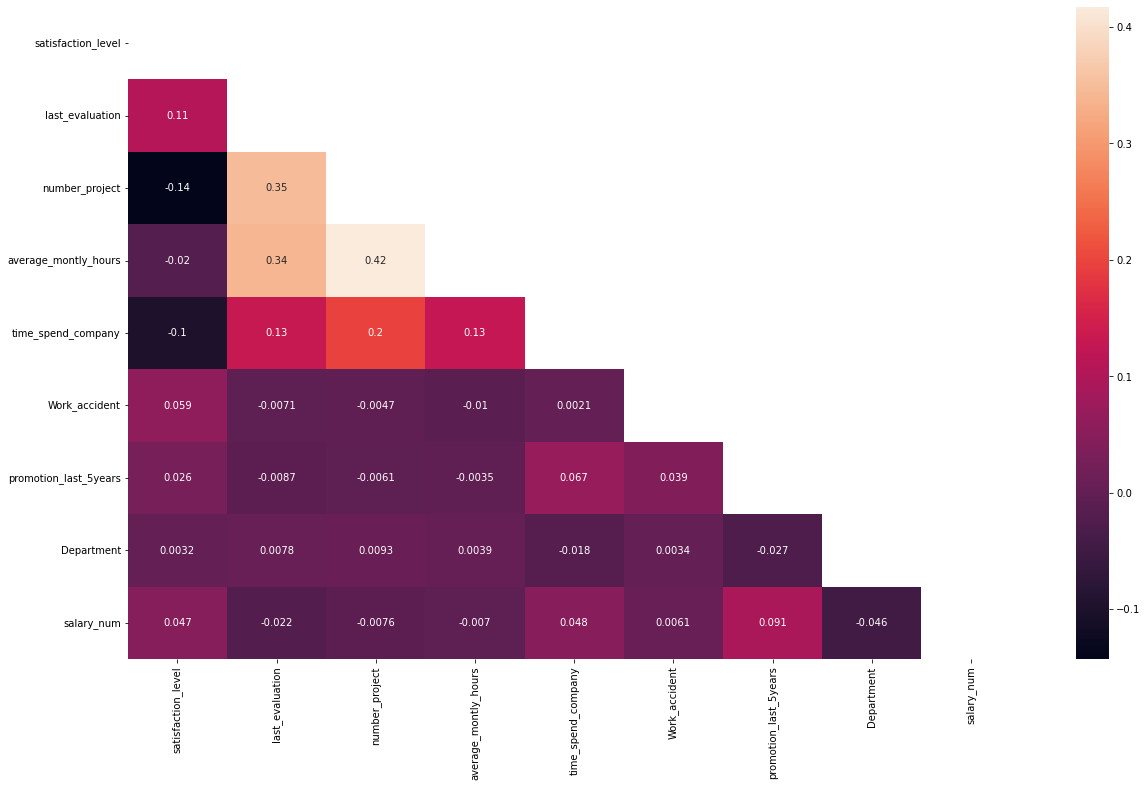

In [19]:
cor1 = df1.corr()
mask = np.triu(np.ones_like(df1.corr()))

plt.figure(figsize=(20,12))
sns.heatmap(cor1, mask=mask, annot=True)

#### Train and Test

In [20]:
X = df1
X.head()
y=df.value_counts

In [21]:
df_train, df_test = train_test_split(X, train_size=0.7)
print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)

Size of training dataset:  (10499, 9)
Size of test dataset:  (4500, 9)


In [56]:
X_train1 = df_train.drop(columns='salary_num', axis =1)
y_train1 = df_train['salary_num']
X_test1 = df_test.drop(columns='salary_num', axis =1)
y_test1 = df_test['salary_num']
X_train1.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 21), (10499,), (4500, 21), (4500,))

In [57]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train1,y_train1)
print("R-Squared on train dataset={}".format(dtm.score(X_train1,y_train1)))

dtm.fit(X_test1,y_test1)   
print("R-Squared on test dataset={}".format(dtm.score(X_test1,y_test1)))

R-Squared on train dataset=0.824016809822355
R-Squared on test dataset=0.8310444418653271


### Tree map

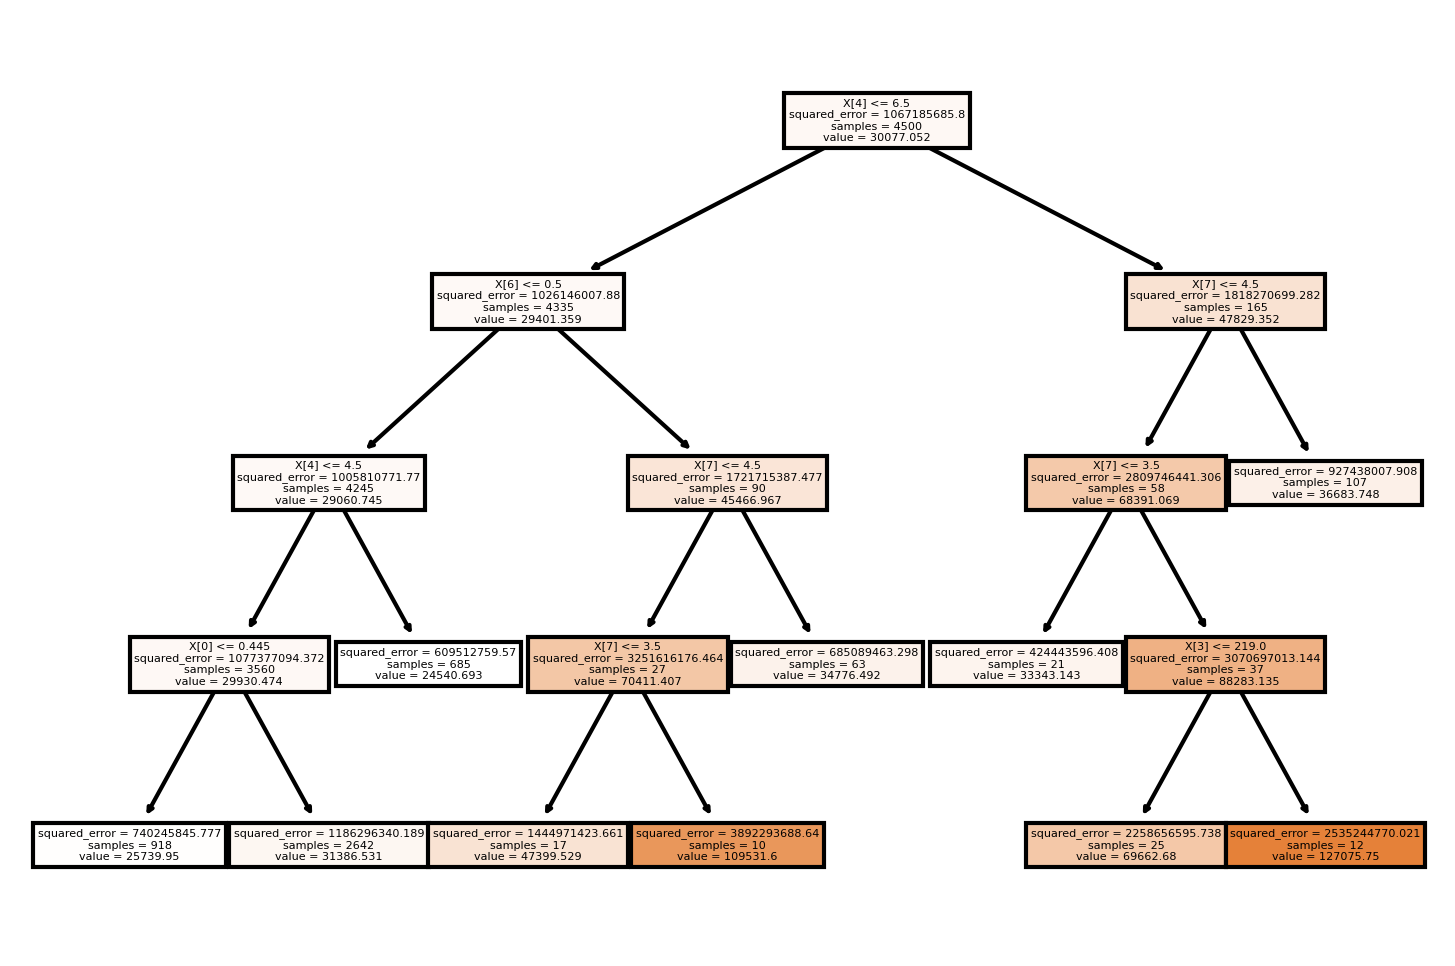

In [24]:
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#### ROC

In [62]:
#Encoding purpose variable to numeric variable
purpose_encoder = preprocessing.LabelEncoder()

# Encoding of the purpose
purpose_encoder.fit(df['salary'])
print(purpose_encoder.classes_)
df['salary'] = purpose_encoder.transform(df['salary'])

df.head()

['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,1,4649
1,0.80,0.86,5,262,6,0,1,0,sales,2,34126
2,0.11,0.88,7,272,4,0,1,0,sales,2,40522
3,0.72,0.87,5,223,5,0,1,0,sales,1,6916
4,0.37,0.52,2,159,3,0,1,0,sales,1,10928


In [66]:
#Encoding purpose variable to numeric variable
purpose_encoder = preprocessing.LabelEncoder()

# Encoding of the purpose
purpose_encoder.fit(df['Department'])
print(purpose_encoder.classes_)
df['Department'] = purpose_encoder.transform(df['Department'])

df.head()

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,7,1,4649
1,0.80,0.86,5,262,6,0,1,0,7,2,34126
2,0.11,0.88,7,272,4,0,1,0,7,2,40522
3,0.72,0.87,5,223,5,0,1,0,7,1,6916
4,0.37,0.52,2,159,3,0,1,0,7,1,10928


In [67]:
#Creating test and training datasets
r_train, r_test = train_test_split(df,train_size = 0.8)

print('Size of training dataset: ', r_train.shape)
print('Size of test dataset: ', r_test.shape)

Size of training dataset:  (11999, 11)
Size of test dataset:  (3000, 11)


In [68]:
X_train2 = r_train.drop(columns='salary_num', axis =1)
Y_train2 = r_train['salary_num']
X_test2 = r_test.drop(columns='salary_num', axis =1)
Y_test2 = r_test['salary_num']
X_train2.shape, Y_train2.shape, X_test2.shape

((11999, 10), (11999,), (3000, 10))

### Training

In [ ]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train2, Y_train2)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test2)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train2, Y_train2) * 100, 2)
acc_log

In [71]:
logreg.intercept_

array([ 0.05833144, -0.02951684, -0.01209944, ...,  0.09290329,
        0.00471949,  0.01883436])

In [72]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
roc

ValueError: X has 21 features, but LogisticRegression is expecting 10 features as input.

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(y_test, Y_pred)
print('AUC: %.3f' % auc)

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

In [ ]:
lr_probs = logreg.predict_proba(X_test)

In [ ]:
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()